# Introduction

I did text pre-processing / cleaning and put dataset into a few standard formats in the first part of this project. The next step is to take a look at the data and see if what I am looking at makes sense.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each politician:

1. **Most common words** - find these and create word clouds
2. **Number of words** - look number of unique words and also how quickly each politician speaks
3. **Heat of Discussion** - look the number of frequencies of interruptions that each politician made during the debate. 

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import nltk
nltk.download('punkt')
from nltk import bigrams
from wordcloud import WordCloud
import plotly.graph_objects as go
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Most Common Words

#### 1st Presidential Debate

In [ ]:
# Read in the document-term matrix
first_dtm = pd.read_pickle('/content/drive/MyDrive/Data Science/us election presidential debates/pickles/first_data_dtm.pkl')

# we did data looks like as transpose format to find out and aggregate the calculations more easily.
first_dtm = first_dtm.transpose()
first_dtm = first_dtm[["Donald Trump","Joe Biden"]]
first_dtm.head()


,Donald Trump,Joe Biden
ability,0,2
able,1,17
abolish,0,0
abraham,0,0
absolutely,3,3


In [ ]:
# Let's find the top 25 words said by each politician
first_top = {}
for c in first_dtm.columns:
    top = first_dtm[c].sort_values(ascending=False).head(25)
    first_top[c]= list(zip(top.index, top.values))

first_top

{'Donald Trump': [('not', 144),
  ('go', 70),
  ('people', 67),
  ('say', 65),
  ('get', 49),
  ('would', 48),
  ('want', 47),
  ('know', 40),
  ('look', 38),
  ('joe', 32),
  ('well', 30),
  ('million', 29),
  ('think', 29),
  ('happen', 27),
  ('no', 27),
  ('year', 26),
  ('country', 25),
  ('see', 24),
  ('ballot', 23),
  ('good', 23),
  ('take', 23),
  ('give', 23),
  ('like', 21),
  ('tell', 21),
  ('thing', 20)],
 'Joe Biden': [('not', 140),
  ('go', 84),
  ('people', 76),
  ('say', 48),
  ('get', 44),
  ('fact', 38),
  ('way', 34),
  ('make', 34),
  ('vote', 33),
  ('no', 32),
  ('look', 28),
  ('know', 27),
  ('well', 26),
  ('deal', 26),
  ('president', 24),
  ('talk', 23),
  ('number', 22),
  ('want', 22),
  ('true', 21),
  ('one', 21),
  ('job', 20),
  ('take', 20),
  ('sure', 19),
  ('like', 19),
  ('would', 18)]}

In [ ]:
# Let's print the top 25 words said by each politician
for speaker, top_words in first_top.items():
    print(speaker)
    print(', '.join([word for word, count in top_words]))
    print('---')

Donald Trump
not, go, people, say, get, would, want, know, look, joe, well, million, think, happen, no, year, country, see, ballot, good, take, give, like, tell, thing
---
Joe Biden
not, go, people, say, get, fact, way, make, vote, no, look, know, well, deal, president, talk, number, want, true, one, job, take, sure, like, would
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning (not,go,say) and could be added to a stop words list, so let's do just that.


In [ ]:
# Look at the most common top words --> add them to the stop word list

# Let's first pull out the top 30 words for each speaker
words = []
for speaker in first_dtm.columns:
    top = [word for (word, count) in first_top[speaker]]
    for t in top:
        words.append(t)
        
words

['not',
 'go',
 'people',
 'say',
 'get',
 'would',
 'want',
 'know',
 'look',
 'joe',
 'well',
 'million',
 'think',
 'happen',
 'no',
 'year',
 'country',
 'see',
 'ballot',
 'good',
 'take',
 'give',
 'like',
 'tell',
 'thing',
 'not',
 'go',
 'people',
 'say',
 'get',
 'fact',
 'way',
 'make',
 'vote',
 'no',
 'look',
 'know',
 'well',
 'deal',
 'president',
 'talk',
 'number',
 'want',
 'true',
 'one',
 'job',
 'take',
 'sure',
 'like',
 'would']

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('not', 2),
 ('go', 2),
 ('people', 2),
 ('say', 2),
 ('get', 2),
 ('would', 2),
 ('want', 2),
 ('know', 2),
 ('look', 2),
 ('well', 2),
 ('no', 2),
 ('take', 2),
 ('like', 2),
 ('joe', 1),
 ('million', 1),
 ('think', 1),
 ('happen', 1),
 ('year', 1),
 ('country', 1),
 ('see', 1),
 ('ballot', 1),
 ('good', 1),
 ('give', 1),
 ('tell', 1),
 ('thing', 1),
 ('fact', 1),
 ('way', 1),
 ('make', 1),
 ('vote', 1),
 ('deal', 1),
 ('president', 1),
 ('talk', 1),
 ('number', 1),
 ('true', 1),
 ('one', 1),
 ('job', 1),
 ('sure', 1)]

In [ ]:
# If more both of the speakers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count == 2]
add_stop_words

['not',
 'go',
 'people',
 'say',
 'get',
 'would',
 'want',
 'know',
 'look',
 'well',
 'no',
 'take',
 'like']

In [ ]:
first_top_words = ['go','say', 'get','would', 'want','well', 'know', 'look', 'take', 'like']

In [ ]:
# Let's update our document-term matrix with the new list of stop words

# Read in cleaned data
first_data_corpus = pd.read_pickle('/content/drive/MyDrive/Data Science/us election presidential debates/pickles/first_whole_corpus.pkl')

# Add new stop words
first_stop_words = text.ENGLISH_STOP_WORDS.union(first_top_words)

# Recreate document-term matrix
cv1 = CountVectorizer(stop_words=first_stop_words)
first_data_cv = cv1.fit_transform(first_data_corpus["clean_text"])
first_data_stop = pd.DataFrame(first_data_cv.toarray(), columns=cv1.get_feature_names())
first_data_stop.index = first_data_corpus.index


In [ ]:
# Pickle it for later use
import pickle
pickle.dump(cv1, open("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/cv1_stop.pkl", "wb"))
first_data_stop.to_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/first_dtm_stop.pkl")

In [ ]:
first_data_stop

,ability,able,abolish,abraham,absolutely,absorb,abuse,academic,accept,accompany,accomplish,accord,accountable,acknowledge,acre,act,actually,add,addition,additional,address,administration,admission,admit,advantage,advisor,affect,affidavit,afford,affordable,afraid,african,africanamerican,africanamericans,agency,ago,agree,ahead,air,airport,...,weekend,welcome,west,western,whatsoever,wherewithal,whichever,whistle,white,wide,wife,willing,win,wing,winner,wipe,wishful,woman,womens,wonder,word,work,worker,workforce,world,worried,worth,wrap,write,wrong,wuhan,xenophobic,xi,yapping,yeah,year,yes,york,young,zero
Donald Trump,0,1,0,0,3,0,0,1,1,0,0,3,0,0,1,1,1,0,1,0,0,4,0,0,0,0,0,0,1,0,1,0,2,0,0,3,7,5,4,2,...,0,0,1,0,1,0,0,0,1,1,1,1,9,4,0,0,0,0,0,1,7,2,0,1,1,0,0,1,0,10,0,2,0,0,2,26,5,4,3,0
Moderator,0,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,3,0,0,1,2,1,0,0,1,2,0,0,0,0,0,0,0,1,1,10,16,0,0,...,1,2,1,2,0,0,1,0,3,0,0,2,0,1,2,0,0,0,0,0,2,0,1,0,0,2,2,0,0,2,0,0,0,0,1,20,3,0,0,1
Joe Biden,2,17,0,0,3,1,0,0,5,1,1,3,3,2,0,6,1,0,2,1,0,6,0,1,2,0,0,1,0,5,1,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,4,0,0,0,4,0,1,3,1,4,1,0,2,8,0,0,5,2,1,0,2,6,1,0,2,1,5,9,5,0,1,1


In [ ]:
first_data_stop = first_data_stop.T
first_data_stop = first_data_stop[["Donald Trump","Joe Biden"]]

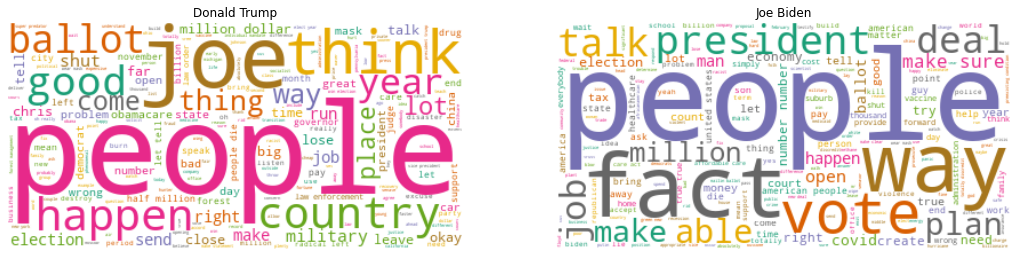

In [ ]:
# Let's make word clounds for each politician
# Reset the output dimensions
plt.rcParams['figure.figsize'] = [18, 18]

speakers = ['Donald Trump','Joe Biden']

wc = WordCloud(stopwords=first_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150)
# Create subplots for each speaker
for index, speaker in enumerate(first_data_stop.columns):
     
    wc.generate(first_data_corpus.clean_text[speaker])
    
    plt.subplot(1, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(speakers[index])
    
    
plt.show()

* Findings:    

  Donald Trump said these words a lot "people, joe, country, military,ballot, obamacare, mask, happen, country, year and etc."

  Joe Biden said these words a lot "people, president, deal, job, fact, plan, economy, tax, state, million,ballot, heatlcare and etc."

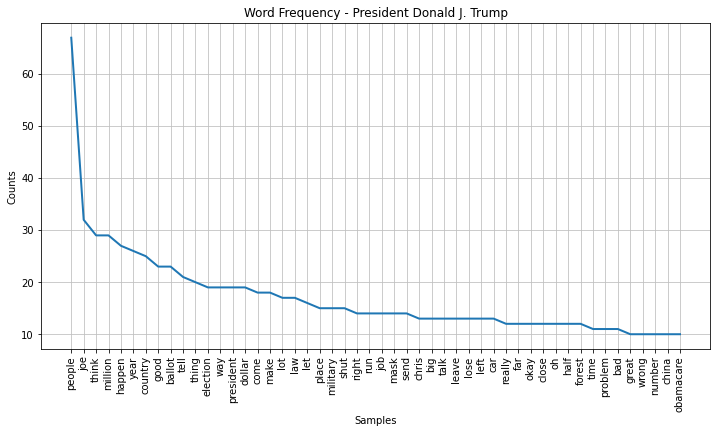

In [ ]:
text_DT = first_data_corpus.loc['Donald Trump']['clean_text']
# tokenize text
words = nltk.word_tokenize(text_DT)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in first_stop_words]
# count word frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - President Donald J. Trump')
word_freqs.plot(50)


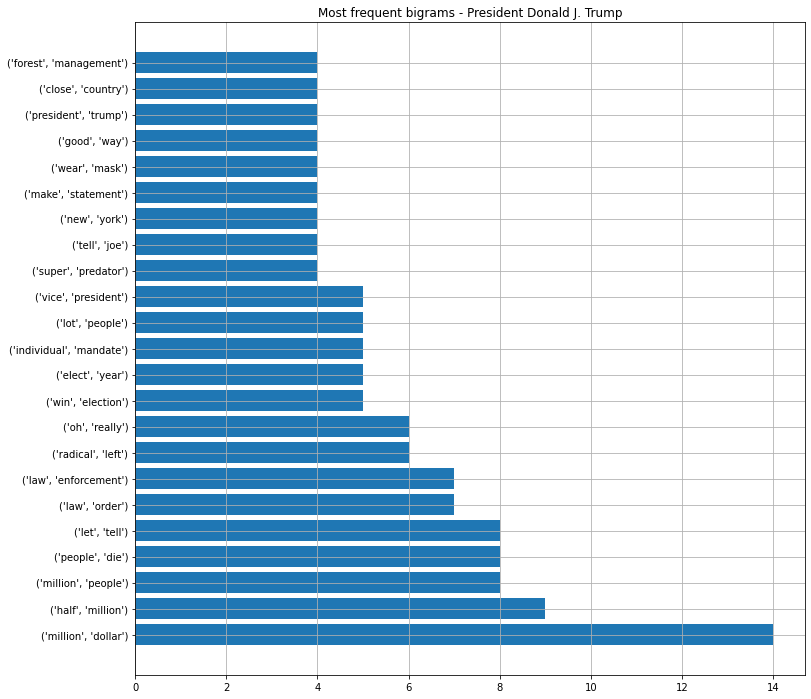

In [ ]:
bigrams_DT = bigrams(words)
counts = Counter(bigrams_DT)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - President Donald J. Trump')
plt.grid()
plt.show()

When we look at the most frequent bigrams told by Donald Trump these bigrams make sense: **forest management, close country, wear mask, new work, super predator, radical left, law order**.

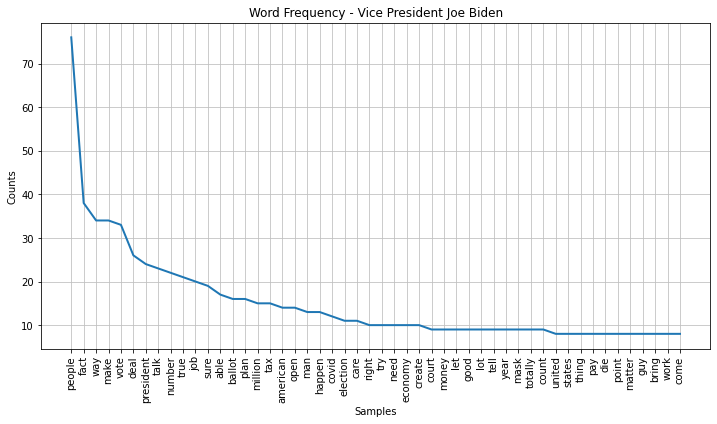

In [ ]:
text_JB = first_data_corpus.loc['Joe Biden']['clean_text']
# tokenize text
words = nltk.word_tokenize(text_JB)
# remove single characters
words = [word for word in words if len(word) > 1]
# remove stopwords
words = [word for word in words if word not in first_stop_words]
# count word frequencies
word_freqs = nltk.FreqDist(words)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Vice President Joe Biden')
word_freqs.plot(50)

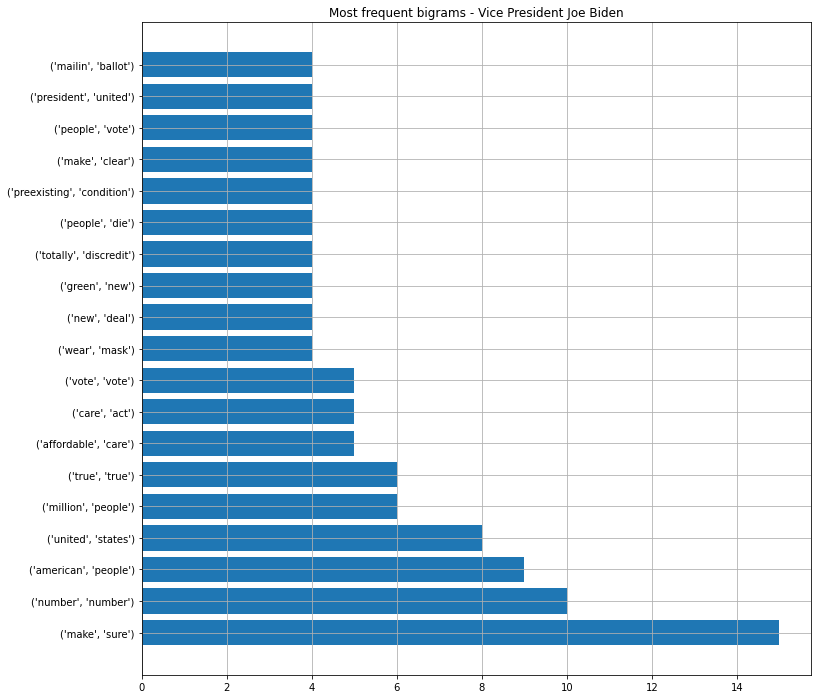

In [ ]:
bigrams_JB = bigrams(words)
counts = Counter(bigrams_JB)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Vice President Joe Biden')
plt.grid()
plt.show()

When we look at the most frequent bigrams told by Joe Biden these bigrams make sense: **mailing ballot, people vote, preexisting condisiton, people die, totaly discredit, wear mask, affordable care.**

#### 2nd Presidential Debate

In [ ]:
# Read in the document-term matrix
second_dtm = pd.read_pickle('/content/drive/MyDrive/Data Science/us election presidential debates/pickles/second_data_dtm.pkl')

# we did data looks like as transpose format to find out and aggregate the calculations more easily.
second_dtm = second_dtm.transpose()
second_dtm = second_dtm[["Donald Trump","Joe Biden"]]
second_dtm.head()

,Donald Trump,Joe Biden
abide,0,1
ability,0,2
able,4,16
abraham,6,2
abroad,0,0


In [ ]:
# Let's find the top 25 words said by each politician
second_top = {}
for c in second_dtm.columns:
    top = second_dtm[c].sort_values(ascending=False).head(25)
    second_top[c]= list(zip(top.index, top.values))

second_top

{'Donald Trump': [('not', 134),
  ('go', 87),
  ('say', 82),
  ('get', 61),
  ('people', 46),
  ('come', 44),
  ('know', 40),
  ('no', 38),
  ('want', 37),
  ('year', 35),
  ('would', 34),
  ('think', 33),
  ('million', 30),
  ('joe', 30),
  ('look', 29),
  ('money', 27),
  ('well', 26),
  ('thing', 26),
  ('make', 26),
  ('country', 25),
  ('talk', 23),
  ('take', 23),
  ('big', 22),
  ('good', 22),
  ('china', 22)],
 'Joe Biden': [('not', 137),
  ('go', 113),
  ('say', 74),
  ('make', 54),
  ('people', 48),
  ('get', 39),
  ('fact', 32),
  ('president', 29),
  ('know', 29),
  ('sure', 26),
  ('no', 26),
  ('come', 24),
  ('talk', 24),
  ('one', 24),
  ('china', 24),
  ('would', 21),
  ('pay', 20),
  ('us', 20),
  ('need', 19),
  ('take', 19),
  ('plan', 18),
  ('well', 18),
  ('happen', 18),
  ('thing', 18),
  ('tell', 17)]}

In [ ]:
# Let's print the top 25 words said by each politician
for speaker, top_words in second_top.items():
    print(speaker)
    print(', '.join([word for word, count in top_words]))
    print('---')

Donald Trump
not, go, say, get, people, come, know, no, want, year, would, think, million, joe, look, money, well, thing, make, country, talk, take, big, good, china
---
Joe Biden
not, go, say, make, people, get, fact, president, know, sure, no, come, talk, one, china, would, pay, us, need, take, plan, well, happen, thing, tell
---


In [ ]:
# Look at the most common top words --> add them to the stop word list

# Let's first pull out the top 30 words for each politician
words2 = []
for speaker in second_dtm.columns:
    top = [word for (word, count) in second_top[speaker]]
    for t in top:
        words2.append(t)
        
words2

['not',
 'go',
 'say',
 'get',
 'people',
 'come',
 'know',
 'no',
 'want',
 'year',
 'would',
 'think',
 'million',
 'joe',
 'look',
 'money',
 'well',
 'thing',
 'make',
 'country',
 'talk',
 'take',
 'big',
 'good',
 'china',
 'not',
 'go',
 'say',
 'make',
 'people',
 'get',
 'fact',
 'president',
 'know',
 'sure',
 'no',
 'come',
 'talk',
 'one',
 'china',
 'would',
 'pay',
 'us',
 'need',
 'take',
 'plan',
 'well',
 'happen',
 'thing',
 'tell']

In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words2).most_common()

[('not', 2),
 ('go', 2),
 ('say', 2),
 ('get', 2),
 ('people', 2),
 ('come', 2),
 ('know', 2),
 ('no', 2),
 ('would', 2),
 ('well', 2),
 ('thing', 2),
 ('make', 2),
 ('talk', 2),
 ('take', 2),
 ('china', 2),
 ('want', 1),
 ('year', 1),
 ('think', 1),
 ('million', 1),
 ('joe', 1),
 ('look', 1),
 ('money', 1),
 ('country', 1),
 ('big', 1),
 ('good', 1),
 ('fact', 1),
 ('president', 1),
 ('sure', 1),
 ('one', 1),
 ('pay', 1),
 ('us', 1),
 ('need', 1),
 ('plan', 1),
 ('happen', 1),
 ('tell', 1)]

In [ ]:
# If more both of the speakers have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words2).most_common() if count == 2]
add_stop_words

['not',
 'go',
 'say',
 'get',
 'people',
 'come',
 'know',
 'no',
 'would',
 'well',
 'thing',
 'make',
 'talk',
 'take',
 'china']

In [ ]:
second_top_words = ['go','say', 'get', 'come', 'know','would','thing', 'look', 'take','well', 'like']

In [ ]:
# Let's update our document-term matrix with the new list of stop words

# Read in cleaned data
second_data_corpus = pd.read_pickle('/content/drive/MyDrive/Data Science/us election presidential debates/pickles/second_whole_corpus.pkl')

# Add new stop words
second_stop_words = text.ENGLISH_STOP_WORDS.union(second_top_words)

# Recreate document-term matrix
cv2 = CountVectorizer(stop_words=second_stop_words)
second_data_cv = cv2.fit_transform(second_data_corpus["clean_text"])
second_data_stop = pd.DataFrame(second_data_cv.toarray(), columns=cv2.get_feature_names())
second_data_stop.index = second_data_corpus.index

In [ ]:
# Pickle it for later use
import pickle
pickle.dump(cv2, open("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/cv2_stop.pkl", "wb"))
second_data_stop.to_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/second_dtm_stop.pkl")

In [ ]:
second_data_stop

,abide,ability,able,abraham,abroad,absolutely,abuse,access,accord,account,accountant,accumulate,accurate,accuse,act,action,activity,actually,actuary,addition,address,administration,advance,adversary,advisor,advocate,affect,affordable,afghanistan,africanamerican,agent,ago,agree,ahead,air,alabama,alcohol,allow,ally,amendment,...,whistle,white,wife,willing,wilmington,win,wind,windmill,window,windshield,winter,wiper,witch,withhold,woman,wonder,wonderful,word,work,worker,world,worldwide,worried,worry,worth,wrap,write,wrong,wuhan,xenophobia,xenophobic,xi,yeah,year,yes,yesterday,york,young,zero,zone
Donald Trump,0,0,4,6,0,1,2,0,1,4,1,0,1,0,0,3,0,1,0,0,0,2,1,0,0,0,0,0,0,0,1,14,0,1,4,1,1,2,0,0,...,0,1,1,1,0,3,2,2,4,0,1,0,1,0,1,0,1,2,9,0,10,3,0,2,0,1,2,2,0,0,2,0,1,35,2,0,7,3,0,4
Moderator,0,0,2,0,1,0,1,0,0,1,2,0,0,1,1,0,0,0,0,0,3,7,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,1,0,2,1,0
Joe Biden,1,2,16,2,0,1,0,3,2,1,0,1,0,2,5,0,1,2,1,1,0,2,0,0,2,0,1,4,1,1,0,0,2,0,2,0,1,4,1,0,...,1,1,2,0,1,1,3,1,1,1,2,1,0,1,1,1,0,2,4,1,6,0,1,8,1,0,1,3,1,1,1,1,0,16,2,0,2,2,3,2


In [ ]:
second_data_stop = second_data_stop.T
second_data_stop = second_data_stop[["Donald Trump","Joe Biden"]]

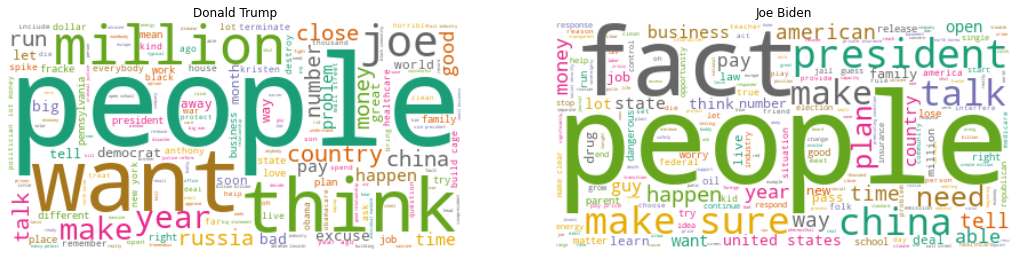

In [ ]:
#Let's make word clouds
# Reset the output dimensions

plt.rcParams['figure.figsize'] = [18, 18]

speakers = ['Donald Trump','Joe Biden']

wc = WordCloud(stopwords=second_stop_words, background_color="white", colormap="Dark2",
               max_font_size=150)
# Create subplots for each speaker
for index, speaker in enumerate(second_data_stop.columns):
   
    wc.generate(second_data_corpus.clean_text[speaker])
    
    plt.subplot(1, 2, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(speakers[index])
    
    
plt.show()

* Findings:    

  Donald Trump said these words a lot "people, joe, million, russia, money, china, democrat, close, bad country, pay, and etc."

  Joe Biden said these words a lot "people, fact, business, american, open, china, tell, money, state, school, drug, oil, need and etc."

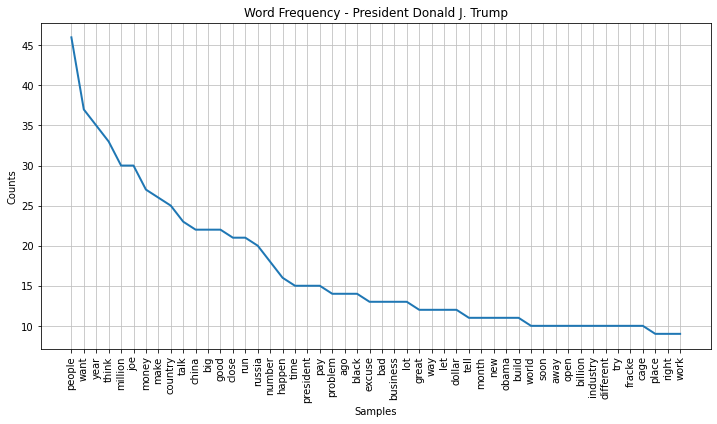

In [ ]:
text_DT = second_data_corpus.loc['Donald Trump']['clean_text']
# tokenize text
words2 = nltk.word_tokenize(text_DT)
# remove single characters
words2 = [word for word in words2 if len(word) > 1]
# remove stopwords
words2 = [word for word in words2 if word not in second_stop_words]
# count word frequencies
word_freqs = nltk.FreqDist(words2)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - President Donald J. Trump')
word_freqs.plot(50)

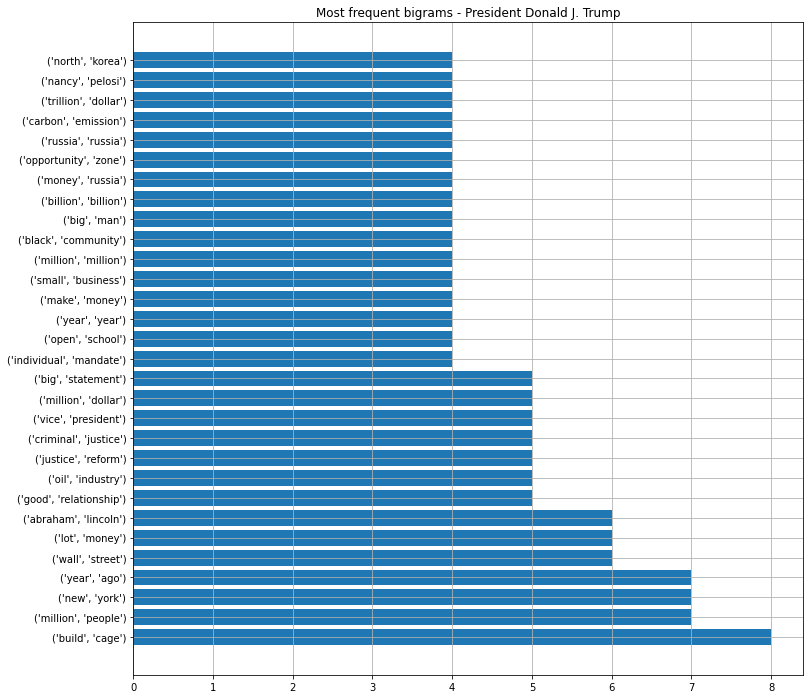

In [ ]:
bigrams_DT = bigrams(words2)
counts = Counter(bigrams_DT)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - President Donald J. Trump')
plt.grid()
plt.show()

When we look at the most frequent bigrams told by Donald Trump these bigrams make sense:**north korea, nancy pelosi, trillion dolar, opportunity zone, black community, open school, criminal justice, oil industry, good relationships, new york, build cage**

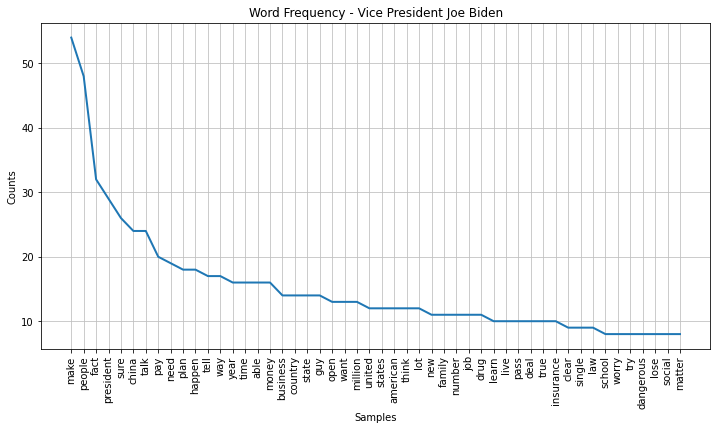

In [ ]:
text_JB = second_data_corpus.loc['Joe Biden']['clean_text']
# tokenize text
words2 = nltk.word_tokenize(text_JB)
# remove single characters
words2 = [word for word in words2 if len(word) > 1]
# remove stopwords
words2 = [word for word in words2 if word not in second_stop_words]
# count word frequencies
word_freqs = nltk.FreqDist(words2)
# plot word frequencies
plt.rcParams['figure.figsize'] = [12, 6]
plt.title('Word Frequency - Vice President Joe Biden')
word_freqs.plot(50)

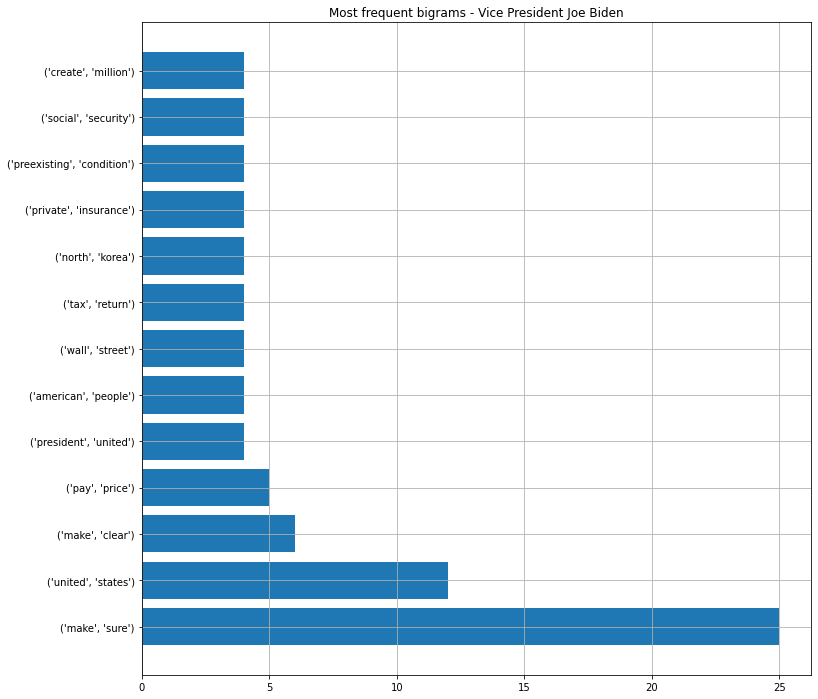

In [ ]:
bigrams_JB = bigrams(words2)
counts = Counter(bigrams_JB)
counts = dict(counts)
# convert dictionary to data frame
dcounts = pd.DataFrame.from_dict(counts, orient='index', columns=['frequency'])
# select only bigrams occuring at least four times
dcounts = dcounts[dcounts.frequency>=4]
# and sort descending
dcounts = dcounts.sort_values(by='frequency', ascending=False)
plt.rcParams['figure.figsize'] = [12, 12]
plt.barh(list(map(str, dcounts.index)), dcounts.frequency)
plt.title('Most frequent bigrams - Vice President Joe Biden')
plt.grid()
plt.show()

When we look at the most frequent bigrams told by Joe Biden these bigrams make sense: **social security, preexisting conditions, private insurance, north korea, tax return, wall street, american people, pay price, united states.**

## Number of Words

Let's find number of unique words that each politician uses.

### 1st Presidential Debate

In [ ]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for speaker in first_dtm.columns:
    uniques = first_dtm[speaker].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
first_data_words = pd.DataFrame(list(zip(speakers, unique_list)), columns=['speaker', 'unique_words'])
first_data_unique = first_data_words.sort_values(by='unique_words')
first_data_unique

,speaker,unique_words
0,Donald Trump,787
1,Joe Biden,873


Let's calculate the words per minute of each politician.

In [ ]:
first_data_corpus

,transcript,speech_time,clean_text
Donald Trump,"How are you doing?, Thank you very much, Chris...",36.0,thank much chris tell simply win election elec...
Moderator,Good evening from the Health Education Campus ...,30.0,good evening health education campus case west...
Joe Biden,"How you doing, man?, I’m well., Well, first of...",28.0,man well well first thank look forward mr pres...


Let's calculate the words per minute of each politician. 

In [ ]:
# Find the total number of words that a politician uses
total_list = []
for speaker in first_data_stop.columns:
    totals = sum(first_data_stop[speaker])
    total_list.append(totals)
    
# speeh times
speech_times = [36, 28]

# Let's add some columns to our dataframe
first_data_words['total_words'] = total_list
first_data_words['run_times'] = speech_times
first_data_words['words_per_minute'] = first_data_words['total_words'] / first_data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = first_data_words.sort_values(by='words_per_minute')
data_wpm_sort

,speaker,unique_words,total_words,run_times,words_per_minute
0,Donald Trump,787,2283,36,63.416667
1,Joe Biden,873,2183,28,77.964286


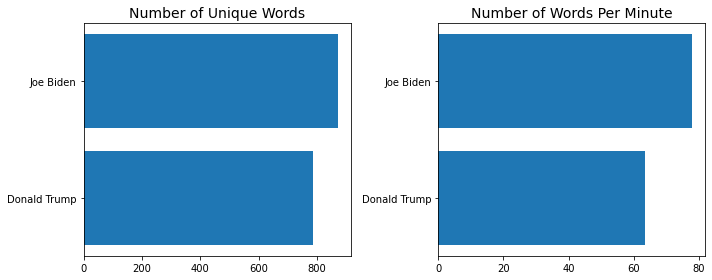

In [ ]:
# Let's plot our findings
import numpy as np
plt.rcParams['figure.figsize'] = [10, 4]
y_pos = np.arange(len(first_data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, first_data_unique.unique_words, align='center')
plt.yticks(y_pos, first_data_unique.speaker)
plt.title('Number of Unique Words', fontsize=14)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.speaker)
plt.title('Number of Words Per Minute', fontsize=14)

plt.tight_layout()
plt.show()

* Findings

**Unique Words** - Joe Biden  used more unique words than Donald Trump.

**Talking Speed** - Joe Biden talked faster than Donald Trump.

### 2nd Presidential Debate

Let's find number of unique words that each politician uses

In [ ]:
# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for speaker in second_dtm.columns:
    uniques = second_dtm[speaker].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
second_data_words = pd.DataFrame(list(zip(speakers, unique_list)), columns=['speaker', 'unique_words'])
second_data_unique = second_data_words.sort_values(by='unique_words')
second_data_unique

,speaker,unique_words
0,Donald Trump,838
1,Joe Biden,964


In [ ]:
second_data_corpus

,transcript,speech_time,clean_text
Donald Trump,"How are you doing? How are you?, So as you kno...",31.0,know million people model expect die close gre...
Moderator,"Good evening, everyone. Good evening. Thank yo...",46.0,good evening everyone good evening thank much ...
Joe Biden,"220,000 Americans dead. You hear nothing else ...",21.0,americans dead hear nothing else say tonight h...


Let's calculate the words per minute of each politician.

In [ ]:
# Find the total number of words that a politician uses
total_list = []
for speaker in second_data_stop.columns:
    totals = sum(second_data_stop[speaker])
    total_list.append(totals)
    
# speeh times
speech_times = [31, 21]

# Let's add some columns to our dataframe
second_data_words['total_words'] = total_list
second_data_words['run_times'] = speech_times
second_data_words['words_per_minute'] = second_data_words['total_words'] / second_data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = second_data_words.sort_values(by='words_per_minute')
data_wpm_sort

,speaker,unique_words,total_words,run_times,words_per_minute
0,Donald Trump,838,2389,31,77.064516
1,Joe Biden,964,2391,21,113.857143


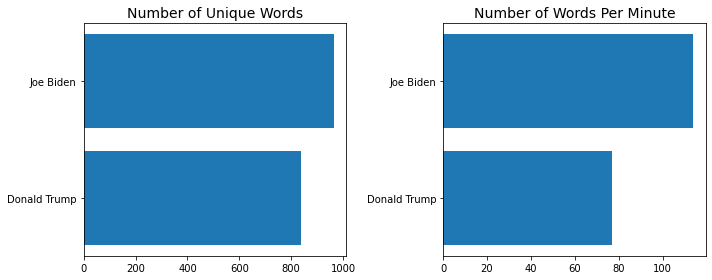

In [ ]:
# Let's plot our findings
import numpy as np
plt.rcParams['figure.figsize'] = [10, 4]
y_pos = np.arange(len(second_data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, second_data_unique.unique_words, align='center')
plt.yticks(y_pos, second_data_unique.speaker)
plt.title('Number of Unique Words', fontsize=14)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.speaker)
plt.title('Number of Words Per Minute', fontsize=14)

plt.tight_layout()
plt.show()

* Findings

**Unique Words** - Joe Biden  used more unique words than Donald Trump.

**Talking Speed** - Joe Biden talked faster than Donald Trump.

## Heat of Discussion

In this part I am going to analyse and visualise the number of times the speakers were interrupting in each others. We will see in which parts were the speakers most anxious, are in deep discussion and want to talk by interrrupring each others. In the following visualisations, when the plot gets more red color that means both speakers start talking more. We consider that the discussions is normal when we don't see color for one speaker while the other is speaking.

### 1st Presidential Debate

In [ ]:
first_debate = pd.read_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/first_debate_corpus.pkl")
first_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text
0,Moderator,80,1,0:01:20,80.0,Good evening from the Health Education Campus ...,good evening health education campus case west...
1,Moderator,130,2,0:02:10,50.0,This debate is being conducted under health an...,debate conduct health safety protocol design c...
2,Joe Biden,169,2,0:02:49,39.0,"How you doing, man?",man
3,Donald Trump,171,2,0:02:51,2.0,How are you doing?,
4,Joe Biden,171,2,0:02:51,0.0,I’m well.,well


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data Science/us election presidential debates/datasets/us_election_2020_1st_presidential_debate.csv")
df.loc[df.minute.isnull(), 'minute'] = '00:00'
first_debate['minute'] = df['minute']
first_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text,minute
0,Moderator,80,1,0:01:20,80.0,Good evening from the Health Education Campus ...,good evening health education campus case west...,01:20
1,Moderator,130,2,0:02:10,50.0,This debate is being conducted under health an...,debate conduct health safety protocol design c...,02:10
2,Joe Biden,169,2,0:02:49,39.0,"How you doing, man?",man,02:49
3,Donald Trump,171,2,0:02:51,2.0,How are you doing?,,02:51
4,Joe Biden,171,2,0:02:51,0.0,I’m well.,well,02:51


In [ ]:
heat = first_debate.groupby(['minutes', 'speaker']).count().reset_index()
fig = go.Figure(data=go.Heatmap(
                z=heat.minute,
                x=heat.minutes,
                y=heat.speaker,
                colorscale='YlOrRd',
                colorbar=dict(
                title="Heat of the discussion",
                titleside="top",
                tickmode="array",
                tickvals=[1, 4, 10],
                ticktext=["very cool", "normal", "Hot!"],
                ticks="outside"
    )
        ))

fig.update_layout(title='First Debate: # of times each one talks in each minute',
                 xaxis_nticks=40)



fig.show()

* Findings

We can see on the heat map there are three specific deep discussions that  all speakers tried to speak at one time.

**First (11-15 mins)** - They were discussing the Covid-19 and the policies and decisions made by Donald Trump.

**Second (45-50 mins)** - They were discussing the Economic plans, tax issues, and how economy was affected because of Covid-19 pandemic.

**Third (80-85 mins)** - They were discussing the Climate Change Plan.

### 2nd Presidential Debate

In [ ]:
second_debate = pd.read_pickle("/content/drive/MyDrive/Data Science/us election presidential debates/pickles/second_debate_corpus.pkl")
second_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text
0,Moderator,18,0,0:00:18,18.0,"Good evening, everyone. Good evening. Thank yo...",good evening everyone good evening thank much ...
1,Donald Trump,457,7,0:07:37,439.0,How are you doing? How are you?,
2,Moderator,478,7,0:07:58,21.0,And I do want to say a very good evening to bo...,want say good evening debate cover six major t...
3,Moderator,507,8,0:08:27,29.0,The goal is for you to hear each other and for...,goal hear american people hear every word say ...
4,Moderator,543,9,0:09:03,36.0,… during this next stage of the coronavirus cr...,next stage coronavirus crisis two minute unint...


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Data Science/us election presidential debates/datasets/us_election_2020_2nd_presidential_debate.csv")
second_debate['minute'] = df2['minute']
second_debate.head()

,speaker,seconds,minutes,hour,duration,text,clean_text,minute
0,Moderator,18,0,0:00:18,18.0,"Good evening, everyone. Good evening. Thank yo...",good evening everyone good evening thank much ...,00:18
1,Donald Trump,457,7,0:07:37,439.0,How are you doing? How are you?,,07:37
2,Moderator,478,7,0:07:58,21.0,And I do want to say a very good evening to bo...,want say good evening debate cover six major t...,07:58
3,Moderator,507,8,0:08:27,29.0,The goal is for you to hear each other and for...,goal hear american people hear every word say ...,08:27
4,Moderator,543,9,0:09:03,36.0,… during this next stage of the coronavirus cr...,next stage coronavirus crisis two minute unint...,09:03


In [ ]:
heat = second_debate.groupby(['minutes', 'speaker']).count().reset_index()
fig = go.Figure(data=go.Heatmap(
                z=heat.minute,
                x=heat.minutes,
                y=heat.speaker,
                colorscale='YlOrRd',
                colorbar=dict(
                title="Heat of the discussion",
                titleside="top",
                tickmode="array",
                tickvals=[1, 4, 10],
                ticktext=["very cool", "normal", "Hot!"],
                ticks="outside"
    )
        ))

fig.update_layout(title='Second Debate: # of times each one talks in each minute',
                 xaxis_nticks=40)



fig.show()

* Findings

We can see that there are three main deep discussion part in the second debate. What is different from the first debate is we faced more discussion and interruption between moderator and Donald Trump in the second one.


**First (42-44 mins)** - They were discussing Trump's bank account in China, his policy towords China and Joe Biden's opinions and policies towords China.

**Second (55-60 mins)** - They were discussing the healthcare, Affordable Care Act and  health insurance of American people.

**Third (90-95 mins)** - They were discussing the economy,energy,enviromental plan,climate change plan and carbon emission problem.